In [68]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import random

# augmentation functions

# input: channel (high res, low res), H, W, D
def translation(image, target_patch_size=(48, 48, 48), curr_pacth_size=(64, 64, 64)):
    # randomly translates the 3D patch by a random value within limits of pre_patch_size and conforms to patch_size
    shift_x = np.random.randint(0, curr_pacth_size[0] - target_patch_size[0])
    shift_y = np.random.randint(0, curr_pacth_size[1] - target_patch_size[1])
    shift_z = np.random.randint(0, curr_pacth_size[2] - target_patch_size[2])

    return image[shift_x:shift_x + target_patch_size[0], shift_y:shift_y + target_patch_size[1], shift_z:shift_z + target_patch_size[2]]

def rotation(image):
    # randomly rotates the image by 90 degrees or -90 degrees along x, y, or z axes
    axis = [(0, 1), (0, 2), (1, 2)]
    chosen_axis = random.choice(axis)
    print("chosen_axis: ", chosen_axis)
    angle = np.random.choice([90, -90, 0, 180])
    return ndimage.rotate(image, angle, axes=chosen_axis, reshape=False)

def flip(image, flip_prob=0.5):
    # randomly choose an axis to flip
    if np.random.rand() < flip_prob:
        axis = np.random.choice([0, 1, 2])
        print("axis: ", axis)
        image = np.flip(image, axis=axis)
    return image

# downsampling image: 
# original voxel size: 0.2; target voxel size: uniformaly distributed, 0.2, 0.4, 0.6, 0.8, 1.0
def downsample(image):
    scale = [1, 2, 3, 4, 5]
    scale = np.random.choice(scale)
    print("scale: ", scale)
    image = ndimage.zoom(image, 1/scale)
    return ndimage.zoom(image, scale)



In [69]:
def show_image(image):
    plt.imshow(image[:,:,32])
    plt.colorbar()


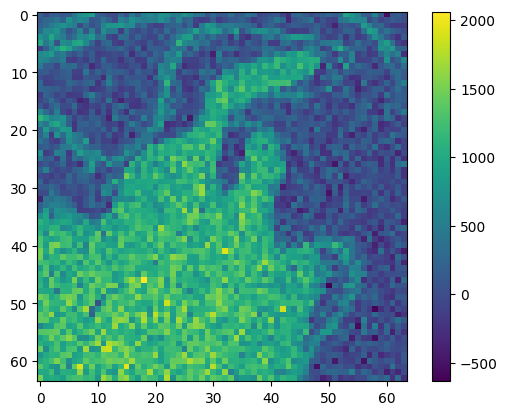

In [70]:
test = np.load('test_patch.npy')

plt.imshow(test[:,:,32])
plt.colorbar()


scale:  5


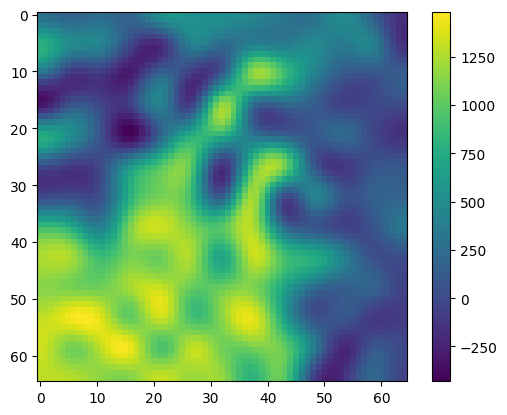

In [75]:
downsampled = downsample(test)
show_image(downsampled)

chosen_axis:  (0, 2)


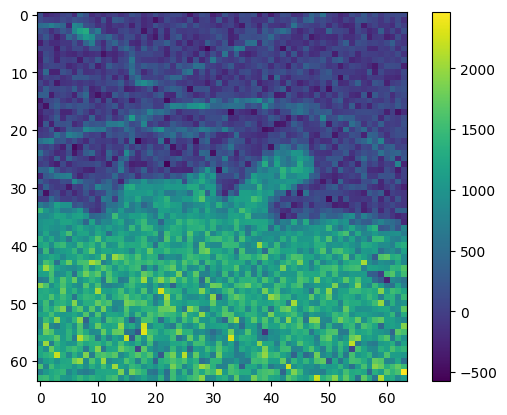

In [72]:
rotated = rotation(test)
show_image(rotated)

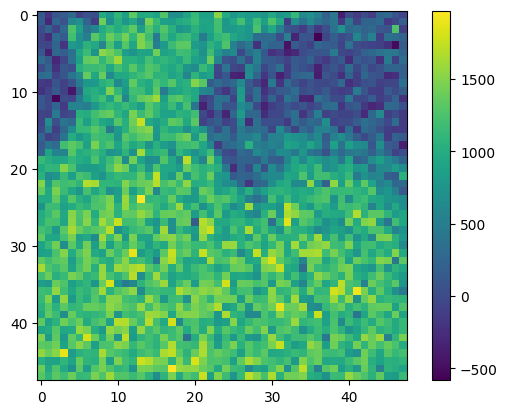

In [73]:
translated = translation(test)
show_image(translated)

axis:  0


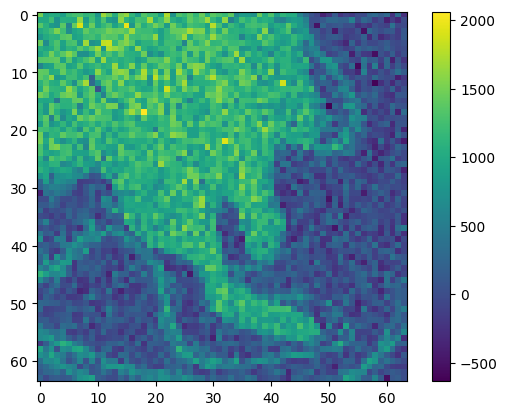

In [76]:
flipped = flip(test, 0.9)
show_image(flipped)